# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166
!pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [22]:
%pip install plotly.express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
Using cached plotly-6.0.0-py3-none-any.whl (14.8 MB)


### Import Statements

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# These might be helpful:
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
# df_data.describe()
# df_data.head()
# df_data.info()
# df_data.shape
# df_data.columns
# df_data.duplicated().sum()
df_data.isnull().sum()


,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [8]:
df_data.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [9]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

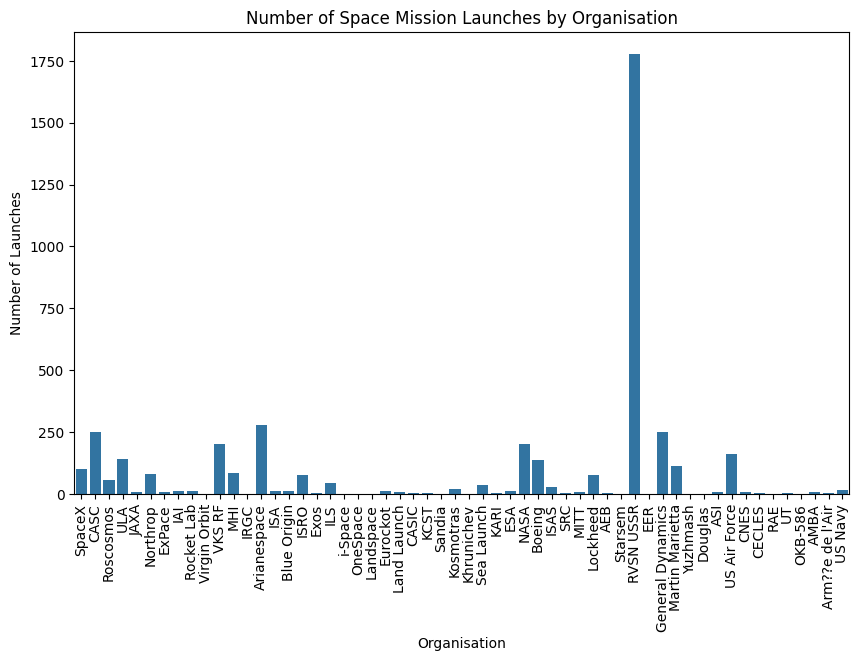

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_data, x='Organisation')
plt.xticks(rotation=90)
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.title('Number of Space Mission Launches by Organisation')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

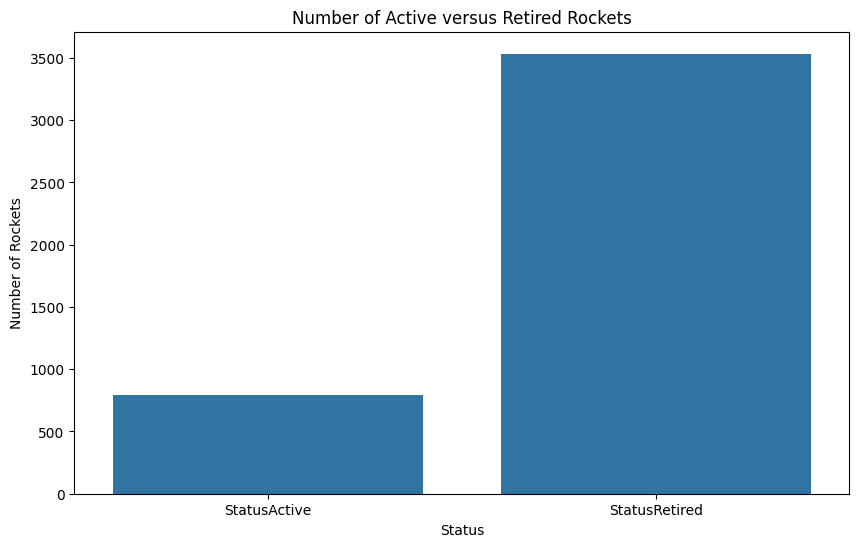

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_data, x='Rocket_Status')
plt.xlabel('Status')
plt.ylabel('Number of Rockets')
plt.title('Number of Active versus Retired Rockets')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

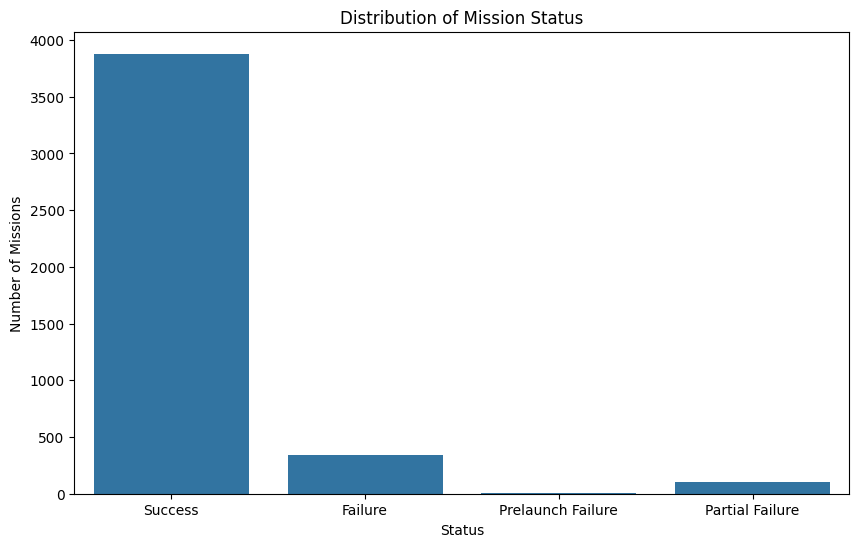

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_data, x='Mission_Status')
plt.xlabel('Status')
plt.ylabel('Number of Missions')
plt.title('Distribution of Mission Status')
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

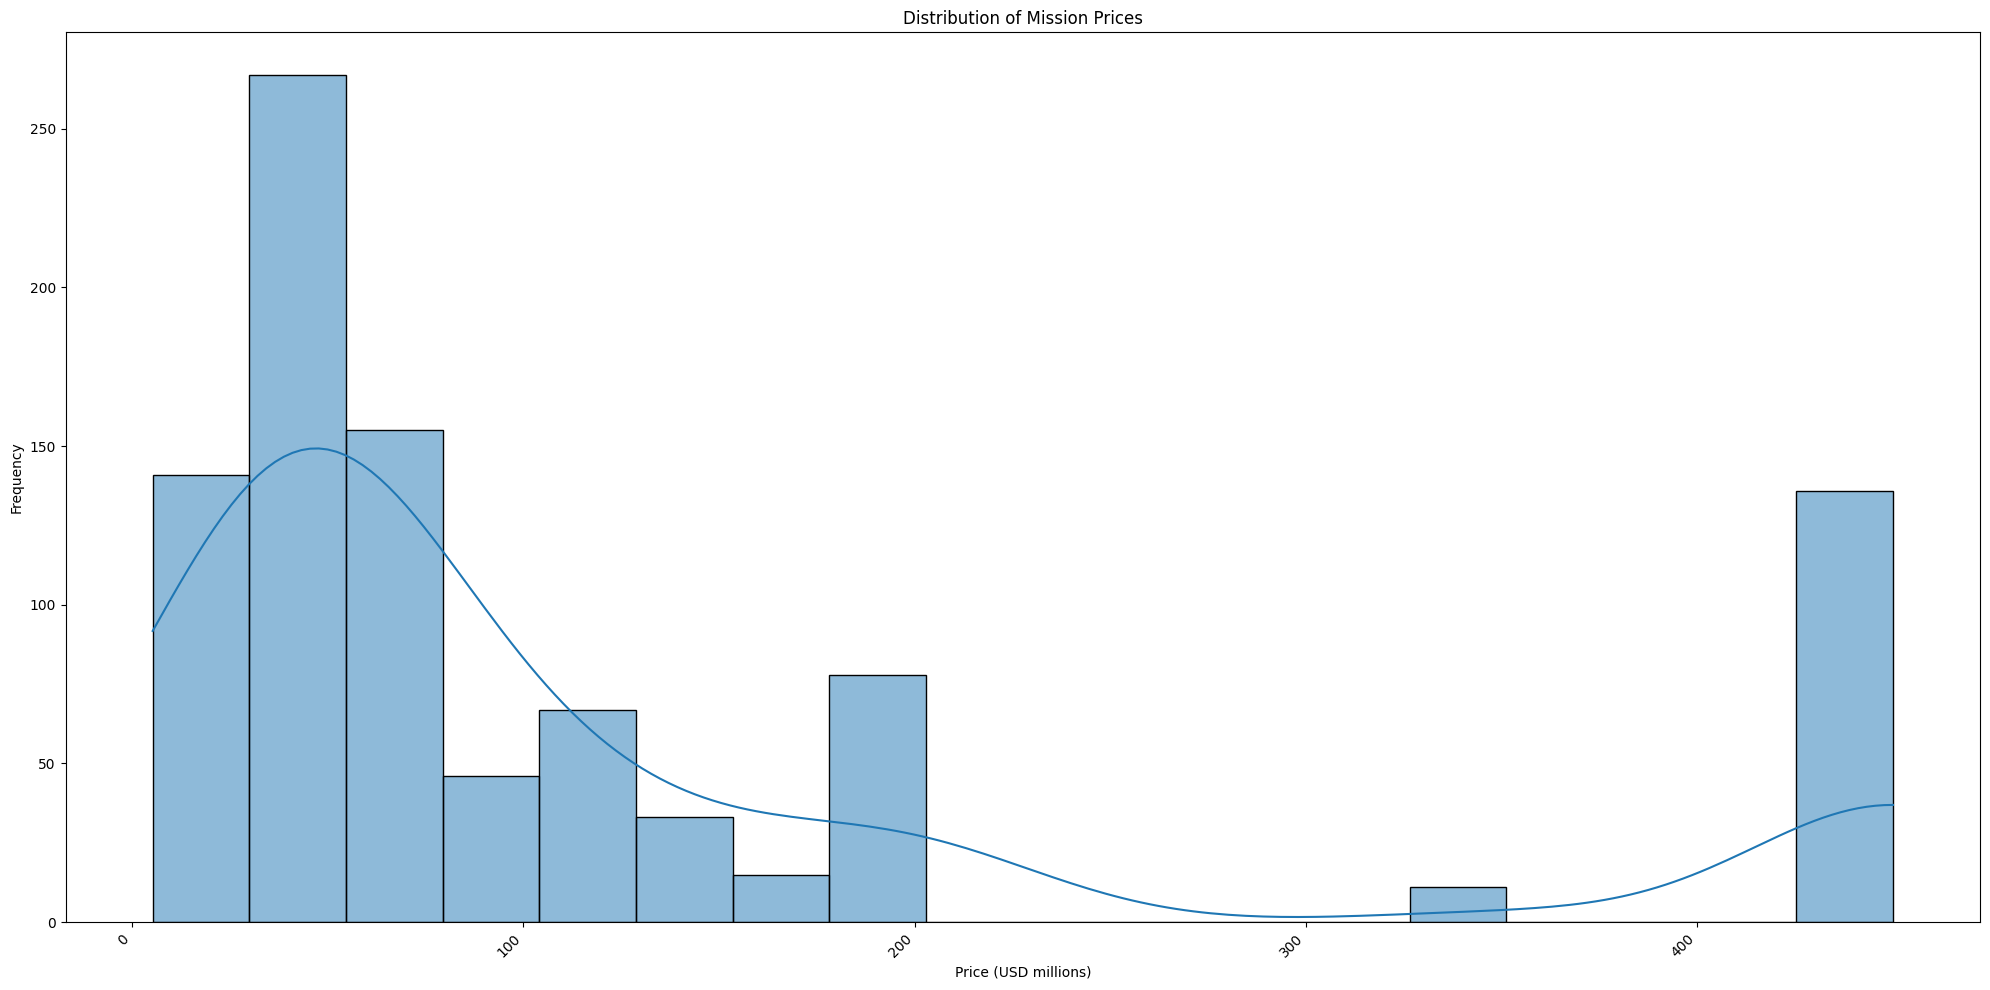

In [16]:
plt.figure(figsize=(20, 10))
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
price_data = df_data['Price'].dropna().sort_values()
sns.histplot(x=price_data, kde=True)
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Mission Prices')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [24]:
country_name_changes = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}


df_data['Location'] = df_data['Location'].replace(country_name_changes)


def extract_country(location):
    parts = location.split(', ')
    country_name = parts[-1]
    return country_name


df_data['Country'] = df_data['Location'].apply(extract_country)


iso_codes = {}
for country_name in df_data['Country'].unique():
    try:
        iso_code = iso3166.countries.get(country_name).alpha3
        iso_codes[country_name] = iso_code
    except:
        pass


df_data['ISO'] = df_data['Country'].map(iso_codes)


launches_by_country = df_data['ISO'].value_counts().reset_index()
launches_by_country.columns = ['ISO', 'Launches']

fig = px.choropleth(launches_by_country,
                    locations='ISO',
                    color='Launches',
                    hover_name='ISO',
                    color_continuous_scale='matter',
                    title='Number of Launches by Country')
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
import iso3166


iso_codes = {}
for country_name in df_data['Country'].unique():
    try:
        iso_code = iso3166.countries.get(country_name).alpha3
        iso_codes[country_name] = iso_code
    except:
        pass


df_data['ISO'] = df_data['Country'].map(iso_codes)


failed_missions = df_data[df_data['Mission_Status'] == 'Failure']


failures_by_country = failed_missions['ISO'].value_counts().reset_index()
failures_by_country.columns = ['ISO', 'Failures']


fig = px.choropleth(failures_by_country,
                    locations='ISO',
                    color='Failures',
                    hover_name='ISO',
                    color_continuous_scale='matter',
                    title='Number of Failures by Country')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [26]:
fig = px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'], width=800, height=800)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, 'SpaceX'),
  Text(1, 0, 'CASC'),
  Text(2, 0, 'Roscosmos'),
  Text(3, 0, 'ULA'),
  Text(4, 0, 'JAXA'),
  Text(5, 0, 'Northrop'),
  Text(6, 0, 'ExPace'),
  Text(7, 0, 'IAI'),
  Text(8, 0, 'Rocket Lab'),
  Text(9, 0, 'Virgin Orbit'),
  Text(10, 0, 'VKS RF'),
  Text(11, 0, 'MHI'),
  Text(12, 0, 'IRGC'),
  Text(13, 0, 'Arianespace'),
  Text(14, 0, 'ISA'),
  Text(15, 0, 'Blue Origin'),
  Text(16, 0, 'ISRO'),
  Text(17, 0, 'Exos'),
  Text(18, 0, 'ILS'),
  Text(19, 0, 'i-Space'),
  Text(20, 0, 'OneSpace'),
  Text(21, 0, 'Landspace'),
  Text(22, 0, 'Eurockot'),
  Text(23, 0, 'Land Launch'),
  Text(24, 0, 'CASIC'),
  Text(25, 0, 'KCST'),
  Text(26, 0, 'Sandia')

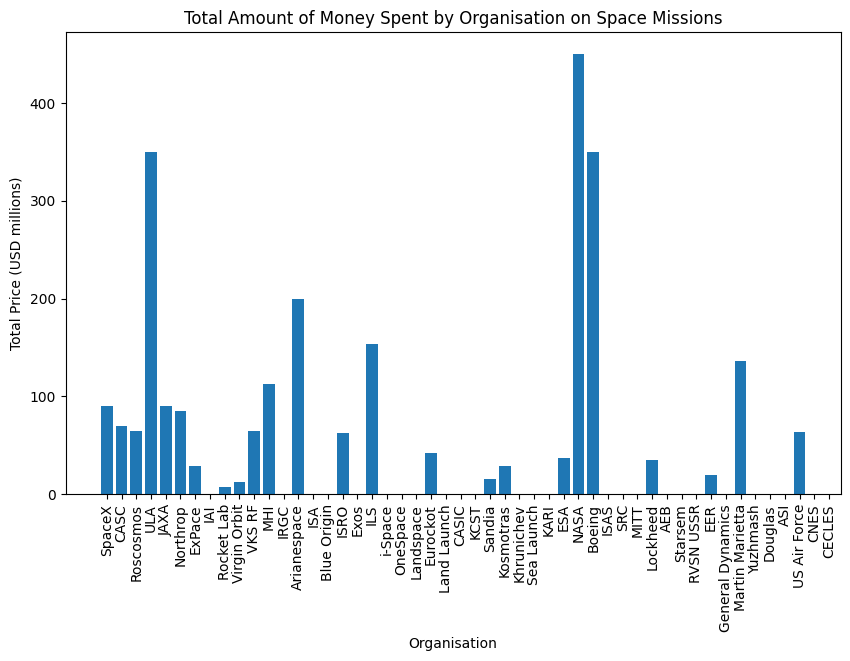

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_data['Organisation'], df_data['Price'])
plt.xlabel('Organisation')
plt.ylabel('Total Price (USD millions)')
plt.title('Total Amount of Money Spent by Organisation on Space Missions')
plt.xticks(rotation=90)

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
launches_per_org = df_data.groupby('Organisation')['Organisation'].count().reset_index(name='Number_of_Launches')

df_data = pd.merge(df_data, launches_per_org, on='Organisation', how='left')

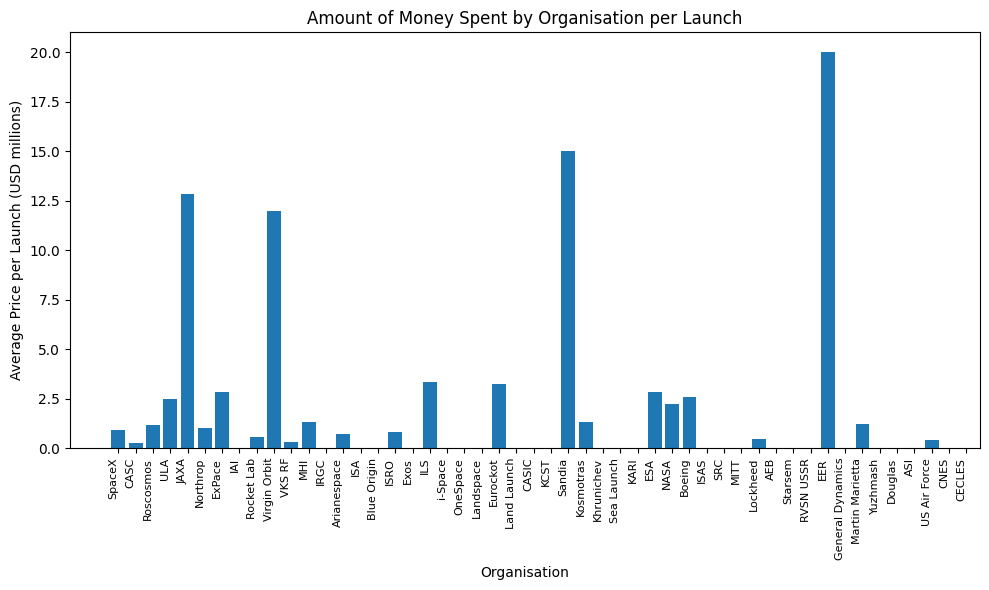

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_data['Organisation'], df_data['Price'] / df_data['Number_of_Launches'])
plt.xlabel('Organisation')
plt.ylabel('Average Price per Launch (USD millions)')
plt.title('Amount of Money Spent by Organisation per Launch')


plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()

plt.show()

# Chart the Number of Launches per Year

<ipython-input-36-8288d16c0d5b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



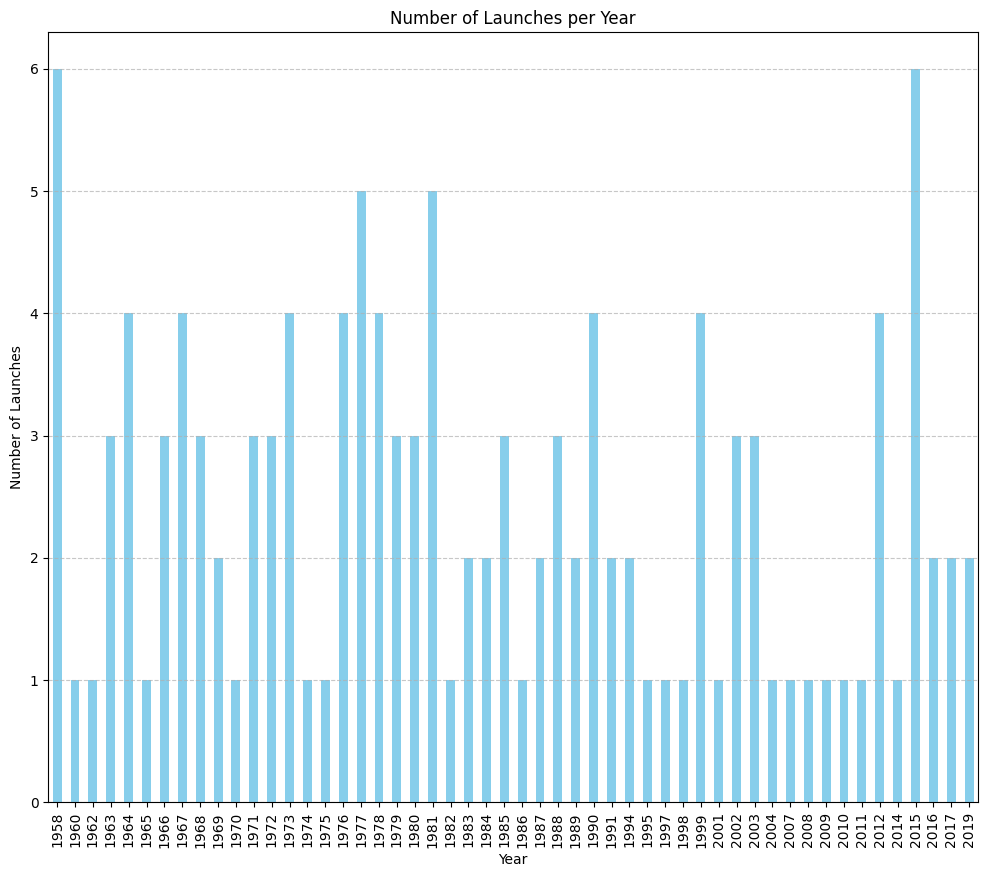

In [36]:

df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y', errors='coerce')


df_data = df_data.dropna(subset=['Date'])


df_data['Year'] = df_data['Date'].dt.year


launches_per_year = df_data['Year'].value_counts().sort_index()


plt.figure(figsize=(12, 10))
launches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [37]:

df_data['Month'] = df_data['Date'].dt.strftime('%B')  # %B gives full month name, %b gives abbreviated month name


launches_per_month = df_data.groupby('Month').size()


rolling_average = launches_per_month.rolling(window=12).mean()  # Adjust window size as needed


max_launches_month = launches_per_month.idxmax()
max_launches_count = launches_per_month.max()
print(f"The month with the highest number of launches is {max_launches_month} with {max_launches_count} launches.")

The month with the highest number of launches is December with 20 launches.


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

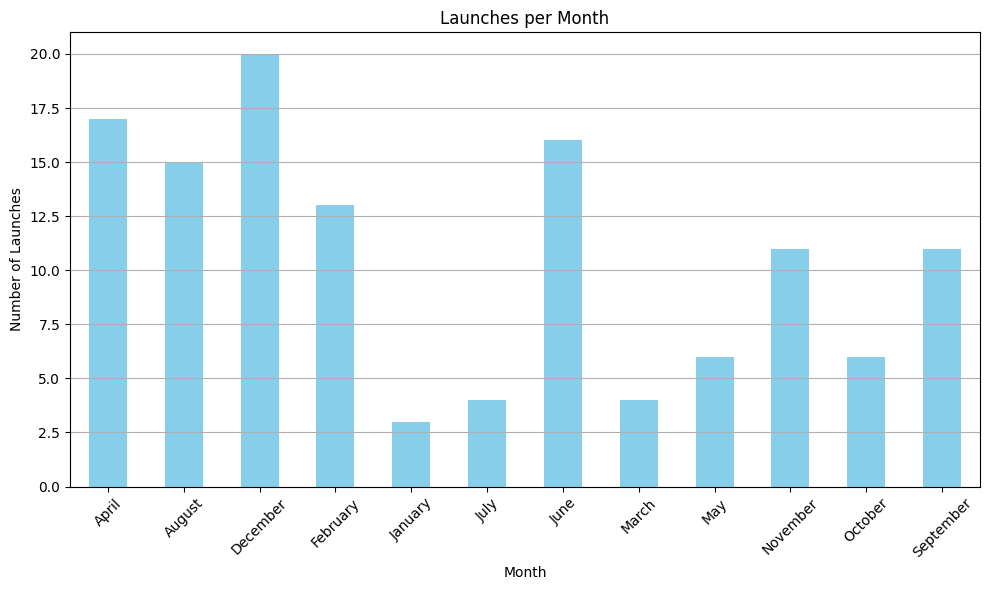

The most popular month for launches is December, with 20 launches.
The least popular month for launches is January, with 3 launches.


In [38]:

plt.figure(figsize=(10, 6))
launches_per_month.plot(kind='bar', color='skyblue')
plt.title('Launches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


most_popular_month = launches_per_month.idxmax()
least_popular_month = launches_per_month.idxmin()
print(f"The most popular month for launches is {most_popular_month}, with {launches_per_month.max()} launches.")
print(f"The least popular month for launches is {least_popular_month}, with {launches_per_month.min()} launches.")

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

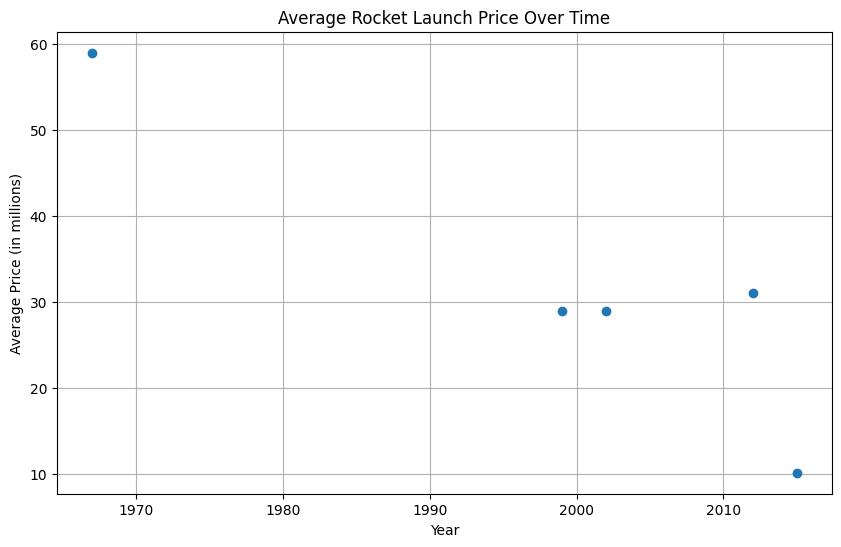

In [39]:

average_price_per_year = df_data.groupby('Year')['Price'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Price'], marker='o')
plt.title('Average Rocket Launch Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (in millions)')
plt.grid(True)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

<ipython-input-40-be4fd19daadb>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



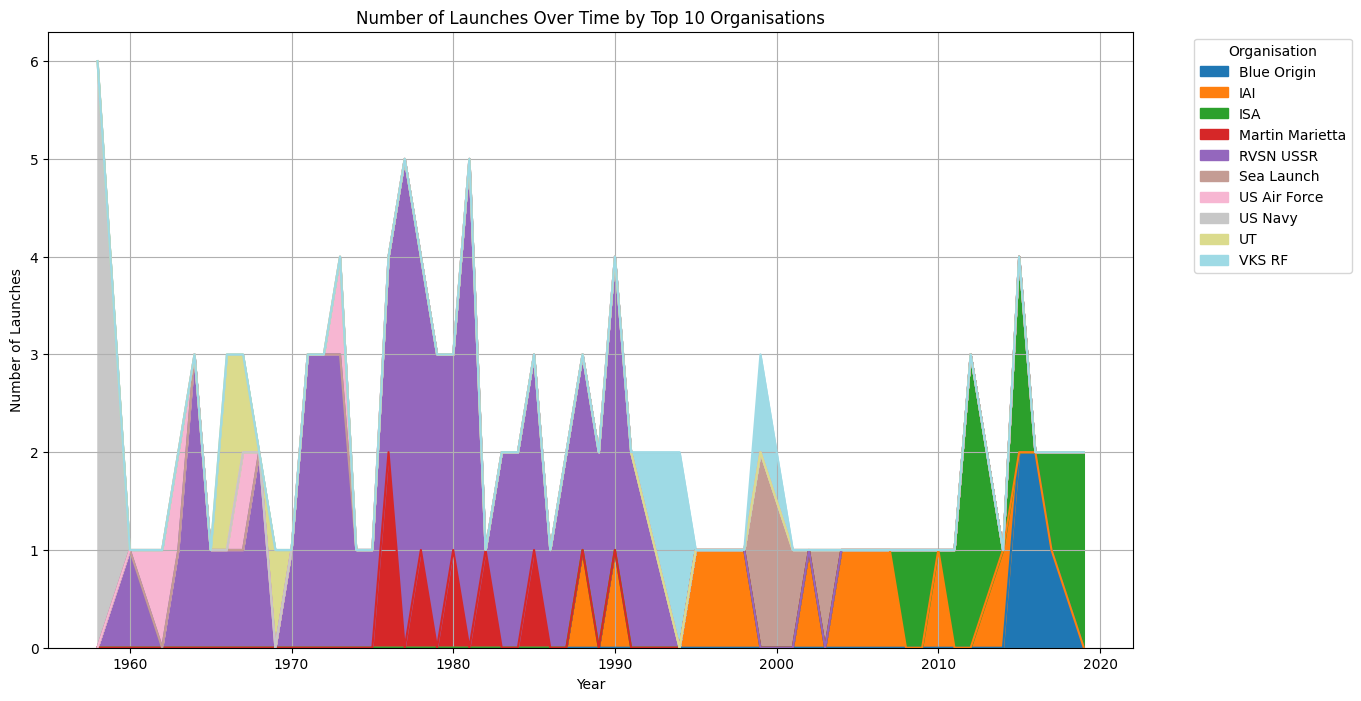

In [40]:

top_10_orgs = df_data['Organisation'].value_counts().head(10).index

df_top_10 = df_data[df_data['Organisation'].isin(top_10_orgs)]


df_top_10['Year'] = df_top_10['Date'].dt.year

launch_counts = df_top_10.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)


launch_counts.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

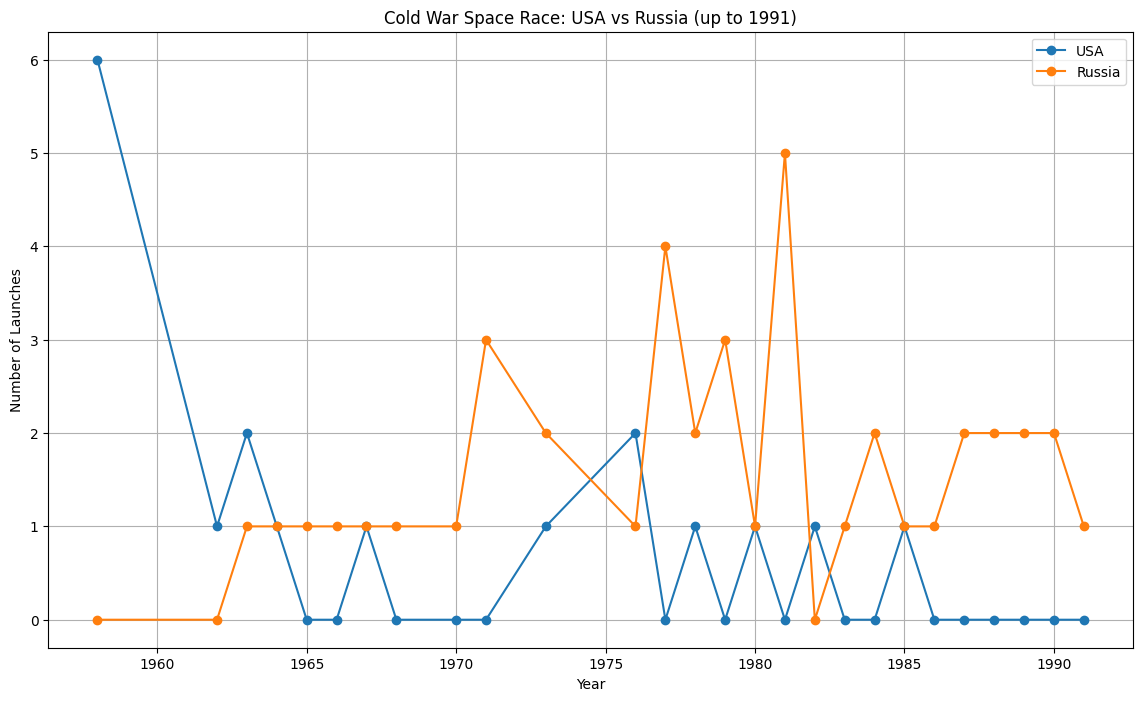

In [41]:
df_data.Country.unique()


cold_war_data = df_data[(df_data['Country'].isin(['USA', 'Russia'])) & (df_data['Year'] <= 1991)]

cold_war_launch_counts = cold_war_data.groupby(['Year', 'Country']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 8))
plt.plot(cold_war_launch_counts.index, cold_war_launch_counts['USA'], marker='o', label='USA')
plt.plot(cold_war_launch_counts.index, cold_war_launch_counts['Russia'], marker='o', label='Russia')

plt.title('Cold War Space Race: USA vs Russia (up to 1991)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()
plt.grid(True)
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [52]:

ussr_countries = ['Russia', 'Kazakhstan', 'Ukraine', 'Belarus', 'Uzbekistan', 'Turkmenistan',
                  'Azerbaijan', 'Armenia', 'Georgia', 'Latvia', 'Lithuania', 'Estonia', 'Moldova',
                  'Kyrgyzstan', 'Tajikistan']


df_data['Superpower'] = df_data['Country'].apply(lambda x: 'USSR' if x in ussr_countries else ('USA' if x == 'USA' else 'Other'))

cold_war_data = df_data[(df_data['Superpower'].isin(['USA', 'USSR'])) & (df_data['Year'] <= 1991)]

launch_counts = cold_war_data['Superpower'].value_counts().reset_index()
launch_counts.columns = ['Superpower', 'Launches']


fig = px.pie(launch_counts, names='Superpower', values='Launches',
             title='Total Number of Launches: USA vs USSR (up to 1991)',
             color_discrete_map={'USA': 'blue', 'USSR': 'red'})


fig.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

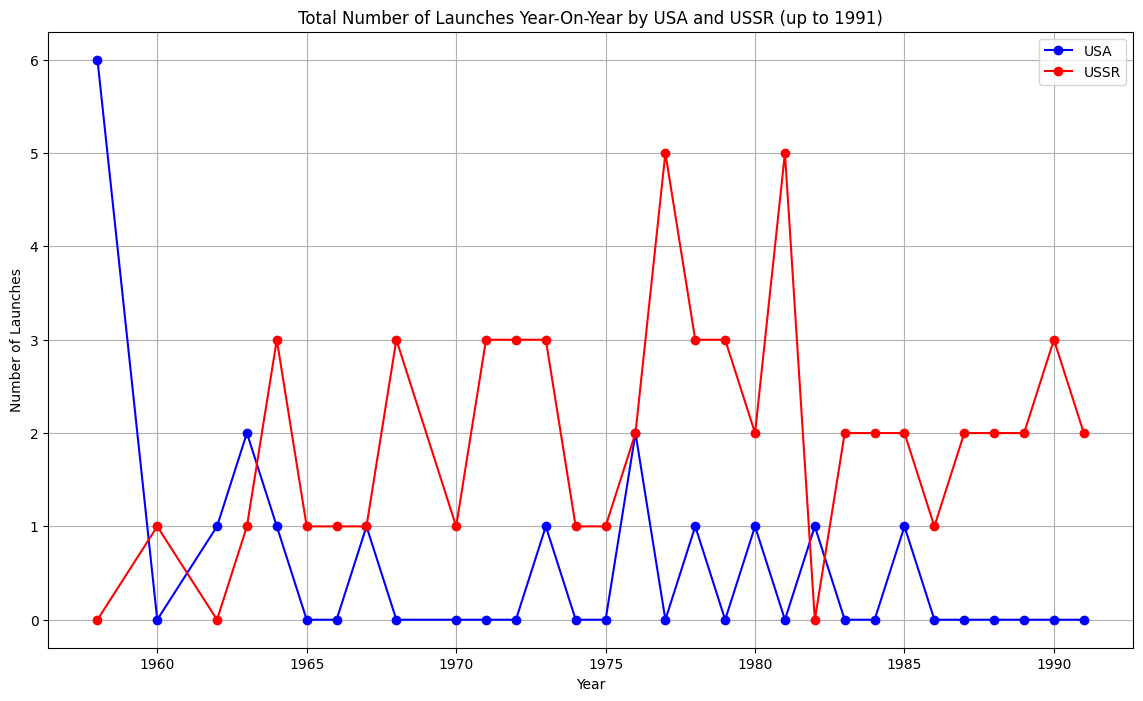

In [45]:

cold_war_data = df_data[(df_data['Superpower'].isin(['USA', 'USSR'])) & (df_data['Year'] <= 1991)]

launch_counts_by_year = cold_war_data.groupby(['Year', 'Superpower']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 8))
plt.plot(launch_counts_by_year.index, launch_counts_by_year['USA'], marker='o', label='USA', color='blue')
plt.plot(launch_counts_by_year.index, launch_counts_by_year['USSR'], marker='o', label='USSR', color='red')

plt.title('Total Number of Launches Year-On-Year by USA and USSR (up to 1991)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

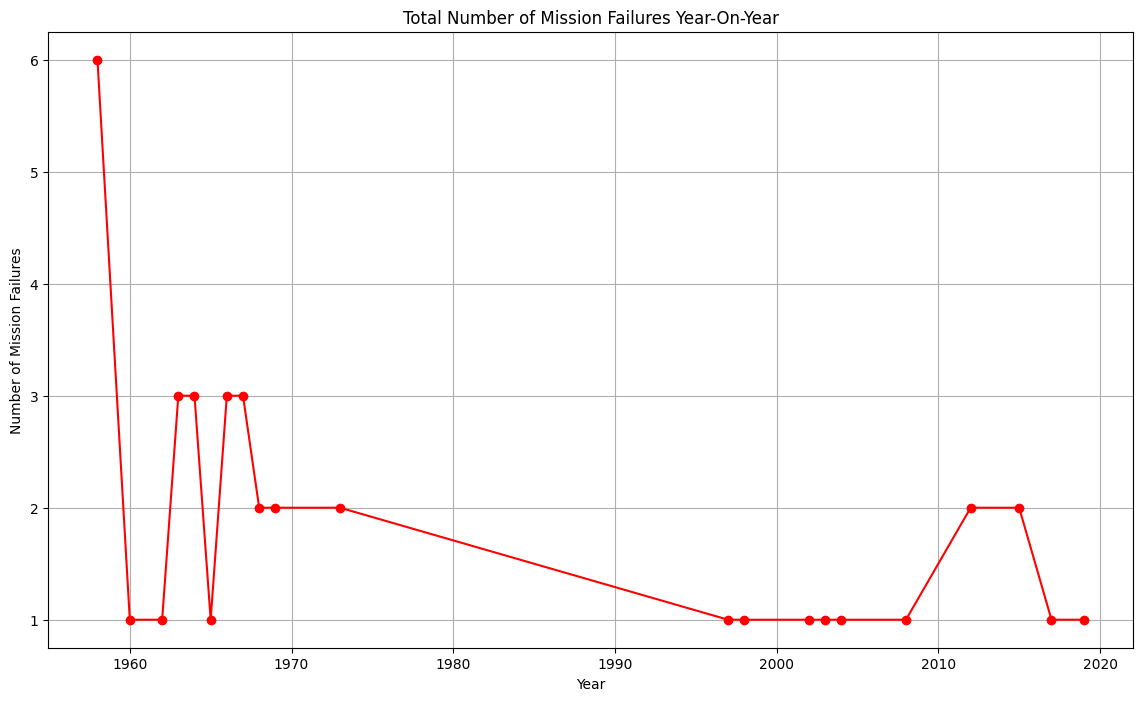

In [46]:

failures_data = df_data[df_data['Mission_Status'] == 'Failure']


failures_by_year = failures_data.groupby('Year').size().reset_index(name='Failures')


plt.figure(figsize=(14, 8))
plt.plot(failures_by_year['Year'], failures_by_year['Failures'], marker='o', color='red')

plt.title('Total Number of Mission Failures Year-On-Year')
plt.xlabel('Year')
plt.ylabel('Number of Mission Failures')
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

<ipython-input-47-df6fab77f1bc>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





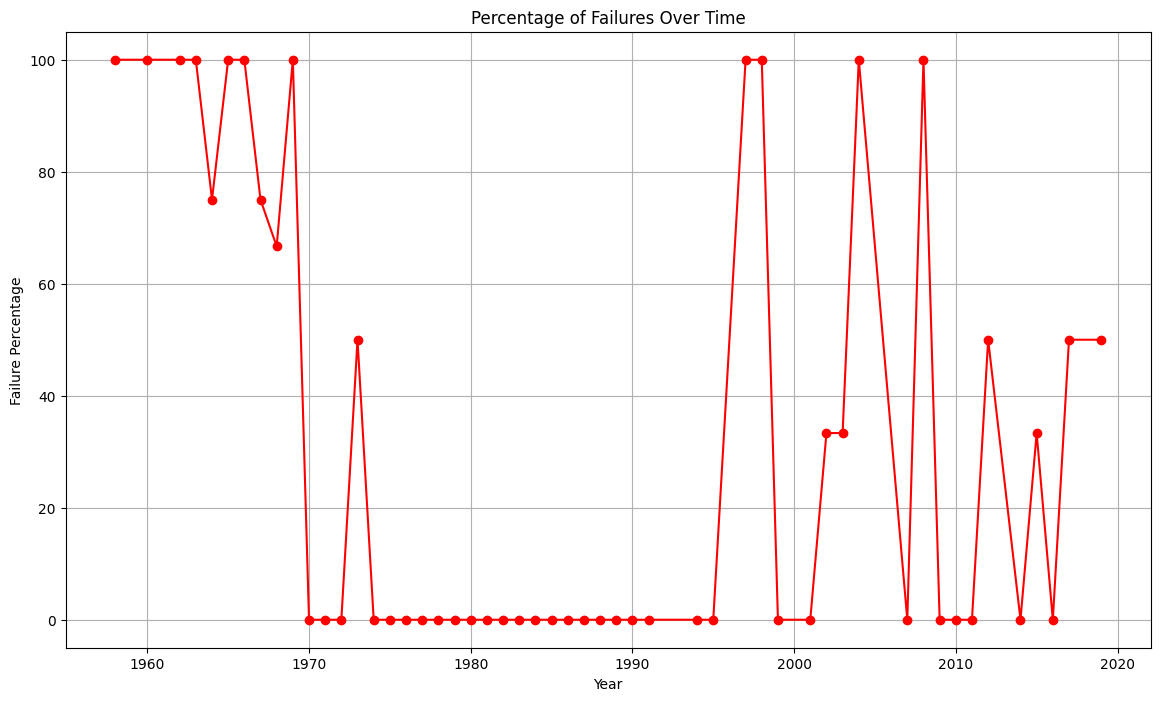

In [47]:

launches_by_year = df_data.groupby('Year').size().reset_index(name='Total Launches')
failures_by_year = failures_data.groupby('Year').size().reset_index(name='Failures')

failures_percentage = pd.merge(launches_by_year, failures_by_year, on='Year', how='left')


failures_percentage['Failures'].fillna(0, inplace=True)


failures_percentage['Failure Percentage'] = (failures_percentage['Failures'] / failures_percentage['Total Launches']) * 100


plt.figure(figsize=(14, 8))
plt.plot(failures_percentage['Year'], failures_percentage['Failure Percentage'], marker='o', color='red')

plt.title('Percentage of Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Failure Percentage')
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [48]:

data_up_to_2020 = df_data[df_data['Year'] <= 2020]


total_launches_by_year = data_up_to_2020.groupby(['Year', 'Country']).size().unstack(fill_value=0)


country_lead_total_launches = total_launches_by_year.idxmax(axis=1)


print("Country in the lead in terms of total launches each year:")
print(country_lead_total_launches)


successful_launches = data_up_to_2020[data_up_to_2020['Mission_Status'] == 'Success']


successful_launches_by_year = successful_launches.groupby(['Year', 'Country']).size().unstack(fill_value=0)


country_lead_successful_launches = successful_launches_by_year.idxmax(axis=1)

print("\nCountry in the lead in terms of successful launches each year:")
print(country_lead_successful_launches)

Country in the lead in terms of total launches each year:
Year
1958              USA
1960       Kazakhstan
1962              USA
1963              USA
1964       Kazakhstan
1965           Russia
1966            Japan
1967        Australia
1968       Kazakhstan
1969            China
1970           Russia
1971           Russia
1972       Kazakhstan
1973           Russia
1974       Kazakhstan
1975       Kazakhstan
1976              USA
1977           Russia
1978           Russia
1979           Russia
1980       Kazakhstan
1981           Russia
1982              USA
1983       Kazakhstan
1984           Russia
1985       Kazakhstan
1986           Russia
1987           Russia
1988           Russia
1989           Russia
1990           Russia
1991       Kazakhstan
1994       Kazakhstan
1995           Israel
1997           Brazil
1998           Israel
1999    Pacific Ocean
2001    Pacific Ocean
2002            China
2003           Brazil
2004           Israel
2007           Israel
2008         

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

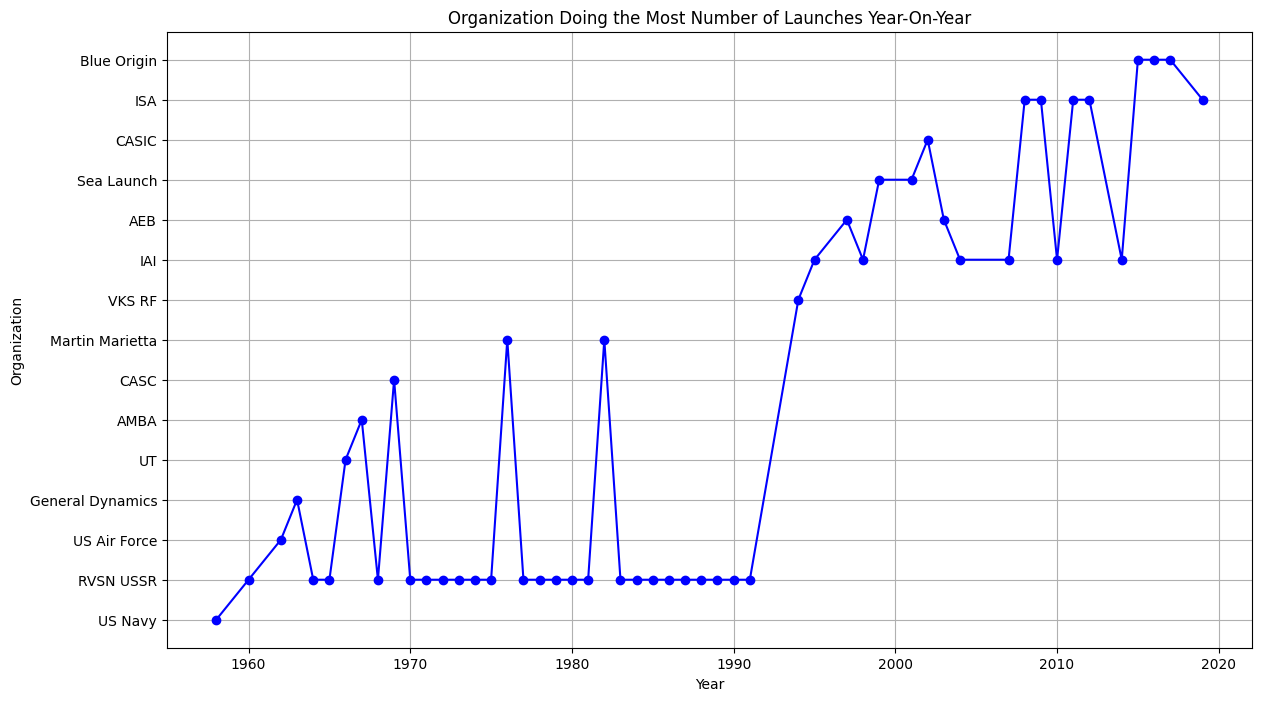

In [49]:

launches_by_year_org = data_up_to_2020.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)


org_lead_by_year = launches_by_year_org.idxmax(axis=1)


plt.figure(figsize=(14, 8))
plt.plot(org_lead_by_year.index, org_lead_by_year.values, marker='o', color='blue')

plt.title('Organization Doing the Most Number of Launches Year-On-Year')
plt.xlabel('Year')
plt.ylabel('Organization')
plt.grid(True)
plt.show()

In [50]:

data_2018_to_2020 = df_data[df_data['Year'].isin([2018, 2019, 2020])]


launches_by_year_org = data_2018_to_2020.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

org_lead_2018 = launches_by_year_org.loc[2018].idxmax() if 2018 in launches_by_year_org.index else "No data"
org_lead_2019 = launches_by_year_org.loc[2019].idxmax() if 2019 in launches_by_year_org.index else "No data"
org_lead_2020 = launches_by_year_org.loc[2020].idxmax() if 2020 in launches_by_year_org.index else "No data"

print("Dominant organization in 2018:", org_lead_2018)
print("Dominant organization in 2019:", org_lead_2019)
print("Dominant organization in 2020:", org_lead_2020)

Dominant organization in 2018: No data
Dominant organization in 2019: ISA
Dominant organization in 2020: No data
